Primeras filas del dataset:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None

Tamaño del conjunto de entrenamiento: 320 muestras
Tamaño del conjunto de prueba: 80 muestras

Entrenando modelo: Naïve Bayes

Precisión del modelo Naïv

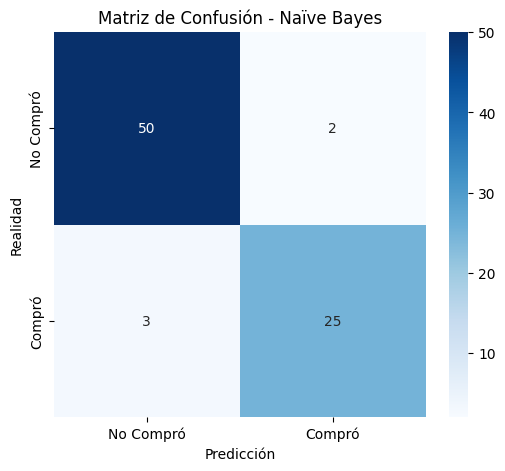

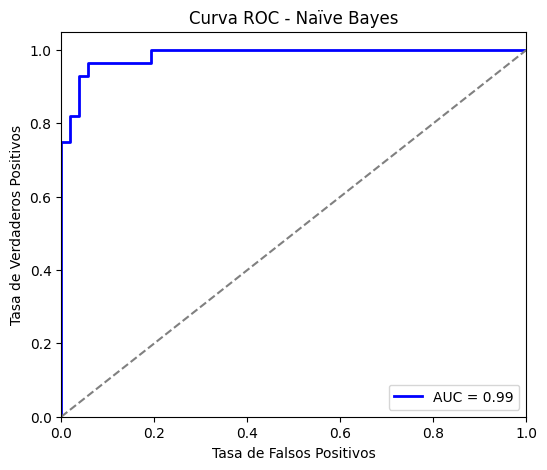


Entrenando modelo: Regresión Logística

Precisión del modelo Regresión Logística: 88.75%

Matriz de confusión:
[[50  2]
 [ 7 21]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



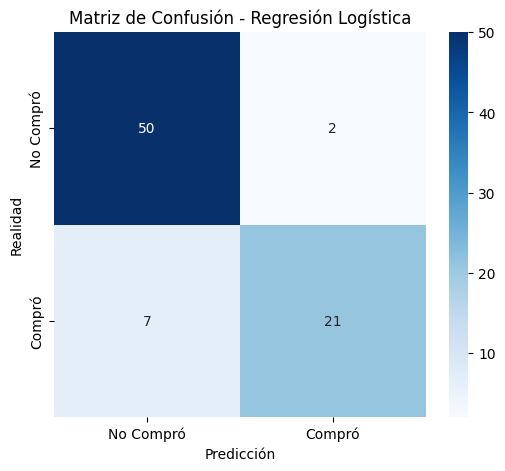

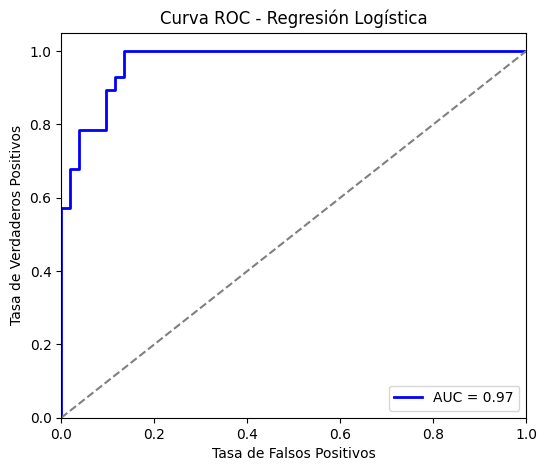


Entrenando modelo: Árbol de Decisión

Precisión del modelo Árbol de Decisión: 87.50%

Matriz de confusión:
[[47  5]
 [ 5 23]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        52
           1       0.82      0.82      0.82        28

    accuracy                           0.88        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.88      0.88      0.88        80



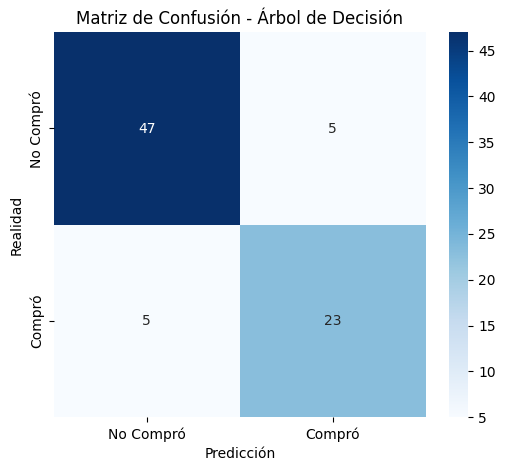

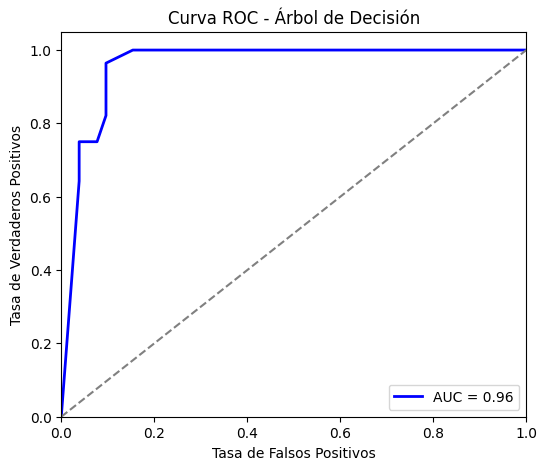


Entrenando modelo: KNN

Precisión del modelo KNN: 92.50%

Matriz de confusión:
[[48  4]
 [ 2 26]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



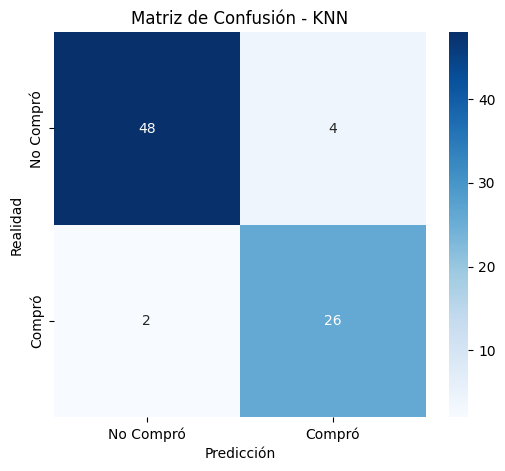

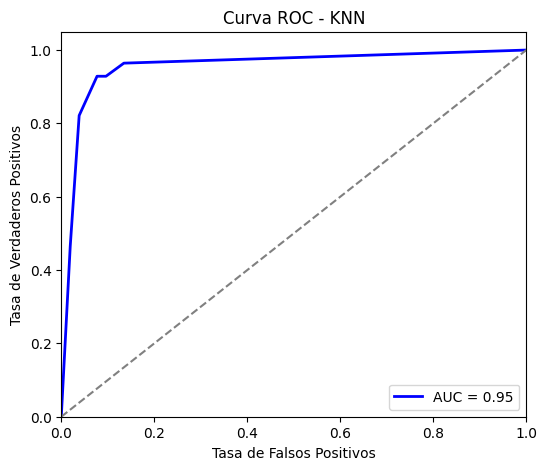

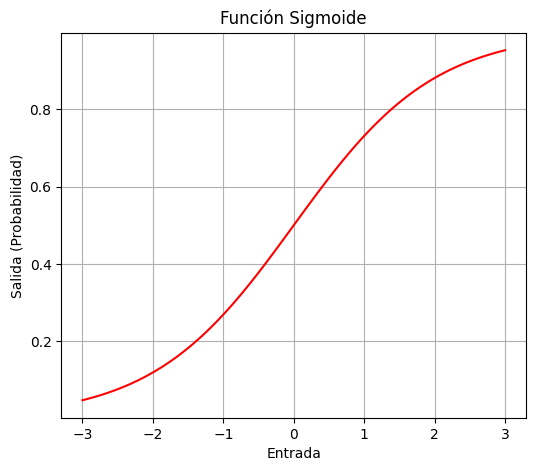

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# 1. Carga del dataset
df = pd.read_csv("Customer_Behaviour.csv")

# 2. Exploración de datos
print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())

# 3. Eliminación de columnas innecesarias (User ID no aporta información relevante)
df = df.drop(columns=["User ID"])

# 4. Codificación de la columna categórica 'Gender'
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])

# 5. Definición de variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=["Purchased"])
y = df["Purchased"]

# 6. Normalización de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"\nTamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

# 8. Definición de modelos con hiperparámetros ajustables
models = {
    "Naïve Bayes": GaussianNB(var_smoothing=1e-9),  # var_smoothing controla la suavización de la varianza
    "Regresión Logística": LogisticRegression(solver='lbfgs', max_iter=1000, C=1.0),  # C es la inversa de la regularización L2
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=5, min_samples_split=10, criterion='gini'),  # max_depth limita la profundidad del árbol
    "KNN": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # metric define la distancia, p=2 es la euclidiana
}

# 9. Entrenamiento y evaluación de cada modelo
for name, model in models.items():
    print(f"\nEntrenando modelo: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Evaluación
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    print(f"\nPrecisión del modelo {name}: {accuracy * 100:.2f}%")
    print("\nMatriz de confusión:")
    print(conf_matrix)
    print("\nReporte de clasificación:")
    print(class_report)
    
    # Visualización de la matriz de confusión
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Compró", "Compró"], yticklabels=["No Compró", "Compró"])
    plt.xlabel("Predicción")
    plt.ylabel("Realidad")
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()
    
    # Curva ROC y AUC
    if y_pred_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Tasa de Falsos Positivos')
        plt.ylabel('Tasa de Verdaderos Positivos')
        plt.title(f'Curva ROC - {name}')
        plt.legend(loc='lower right')
        plt.show()

# 10. Visualización de la curva sigmoidea
x_vals = np.linspace(-3, 3, 100)
y_vals = 1 / (1 + np.exp(-x_vals))

plt.figure(figsize=(6, 5))
plt.plot(x_vals, y_vals, color='red')
plt.xlabel('Entrada')
plt.ylabel('Salida (Probabilidad)')
plt.title('Función Sigmoide')
plt.grid()
plt.show()
